In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, Imputer, Normalizer, StandardScaler

# sklearn meteics for model performance
from sklearn.metrics import confusion_matrix,roc_curve, auc, roc_auc_score

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for splitting data into train and test
from sklearn.cross_validation import train_test_split

import logging
logging.basicConfig(level=logging.DEBUG)

import statsmodels.api as sm
from patsy.highlevel import dmatrices

%matplotlib inline

DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown
DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown


# Read Data

In [2]:
PATH = 'C:/Users/Paperspace/Desktop/HackerEarthGit/Dataset/'
build_owner = pd.read_csv(f"{PATH}Building_Ownership_Use.csv", low_memory=False)
build_struct = pd.read_csv(f"{PATH}Building_Structure.csv", low_memory=False)
train = pd.read_csv(f"{PATH}train.csv",low_memory=False)
test = pd.read_csv(f"{PATH}test.csv",low_memory=False)


#### Details of the files are as follows: 

#### train.csv : 

|Varaible| Descrition|
|--------|-----------|
|area_assesed|Indicates the nature of the damage assessment in terms of the areas of the building that were assessed|
|building_id|A unique ID that identifies every individual building|
|damage_grade|Damage grade assigned to the building after assessment (Target Variable)|
|district_id|District where the building is located|
|has_geotechnical_risk|Indicates if building has geotechnical risks|
|has_geotechnical_risk_fault_crack|Indicates if building has geotechnical risks related to fault cracking|
|has_geotechnical_risk_flood|Indicates if building has geotechnical risks related to flood|
|has_geotechnical_risk_land_settlement|Indicates if building has geotechnical risks related to land settlement|
|has_geotechnical_risk_landslide|Indicates if building has geotechnical risks related to landslide|
|has_geotechnical_risk_liquefaction|Indicates if building has geotechnical risks related to liquefaction|
|has_geotechnical_risk_other|Indicates if building has any other  geotechnical risks|
|has_geotechnical_risk_rock_fall|Indicates if building has geotechnical risks related to rock fall|
|has_repair_started|Indicates if the repair work had started|
|vdcmun_id|Municipality where the building is located|

#### test.csv

Contains the same variables as the train.csv except the 'damage_grade' which is the target variable/ varaible to be predicted.

#### Building_Ownership_Use.csv: 

|Varaible|Description|
|--------|-----------|
|building_id|A unique ID that identifies every individual building|
|district_id|District where the building is located|
|vdcmun_id|Municipality where the building is located|
|ward_id|Ward Number in which the building is located|
|legal_ownership_status|Legal ownership status of the land in which the building was built|
|count_families|Number of families in the building|
|has_secondary_use|indicates if the building is used for any secondary purpose|
|has_secondary_use_agriculture|indicates if the building is secondarily used for agricultural purpose|
|has_secondary_use_hotel|indicates if the building is secondarily used as hotel|
|has_secondary_use_rental|indicates if the building is secondarily used for rental purpose|
|has_secondary_use_institution|indicates if the building is secondarily used for institutional purpose|
|has_secondary_use_school|indicates if the building is secondarily used as school|
|has_secondary_use_industry|indicates if the building is secondarily used for industrial purpose|
|has_secondary_use_health_post|indicates if the building is secondarily used as health post|
|has_secondary_use_gov_office|indicates if the building is secondarily used as government office|
|has_secondary_use_use_police|indicates if the building is secondarily used as police station|
|has_secondary_use_other|indicates if the building is secondarily used for other purpose|


#### Building_Structure.csv

|Variable|Description|
|--------|-----------|
|building_id|A unique ID that identifies every individual building|
|district_id|District where the building is located|
|vdcmun_id|Municipality where the building is located|
|ward_id|Ward Number in which the building is located|
|count_floors_pre_eq|Number of floors that the building had before the earthquake|
|count_floors_post_eq|Number of floors that the building had after the earthquake|
|age_building|Age of the building (in years)|
|plinth_area_sq_ft|Plinth area of the building (in square feet)|
|height_ft_pre_eq|Height of the building before the earthquake (in feet)|
|height_ft_post_eq|Height of the building after the earthquake (in feet)|
|land_surface_condition|Surface condition of the land in which the building is built	|
|foundation_type|Type of foundation used in the building|
|roof_type|Type of roof used in the building|
|ground_floor_type|Ground floor type|
|other_floor_type|Type of construction used in other floors (except ground floor and roof)|
|position|Position of the building|
|plan_configuration|Building plan configuration|
|has_superstructure_adobe_mud|indicates if the superstructure of the building is made of Adobe/Mud|
|has_superstructure_mud_mortar_stone|indicates if the superstructure of the building is made of Mud Mortar - Stone|
|has_superstructure_stone_flag| indicates if the superstructure of the building is made of Stone|
|has_superstructure_mud_mortar_brick|indicates if the superstructure of the building is made of Cement Mortar - Stone|
|has_superstructure_cement_mortar_brick|indicates if the superstructure of the building is made of Mud Mortar - Brick|
|has_superstructure_timber|indicates if the superstructure of the building is made of Timber|
|has_superstructure_bamboo|indicates if the superstructure of the building is made of Bamboo|
|has_superstructure_rc_non_engineered|indicates if the superstructure of the building is made of RC (Non Engineered)|
|has_superstructure_rc_engineered|indicates if the superstructure of the building is made of RC (Engineered)|
|has_superstructure_other| indicates if the superstructure of the building is made of any other material|
|condition_post_eq|Actual contition of the building after the earthquake|


In [3]:
len(train) + len(test), len(build_owner), len(build_struct)

(1052936, 1052948, 1052948)

In [4]:
data = (train.merge(build_struct, how='inner', on=['building_id','district_id','vdcmun_id']))
data = (data.merge(build_owner, how='inner', on=['building_id','district_id','vdcmun_id','ward_id']))

combined_set = pd.concat([train.loc[:,train.columns!='damage_grade'], test], axis = 0) # Stacks them vertically
combined_set = (combined_set.merge(build_struct, how='inner', on=['building_id','district_id','vdcmun_id']))
combined_set = (combined_set.merge(build_owner, how='inner', on=['building_id','district_id','vdcmun_id','ward_id']))

In [5]:
data.head()

,area_assesed,building_id,damage_grade,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,Both,24385bfd2a2,Grade 4,24,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Both,405d1bbebbf,Grade 2,44,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Both,351d9bc71f6,Grade 1,36,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Building removed,2be3a971166,Grade 5,30,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Both,34c7d073ea6,Grade 3,36,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Exploratory Data Analysis

## Column Values


Let's look at the number of columns of each data type. **int64** and **float64** are numeric variables (which can be either discrete or continuous). **object** columns contain strings and are categorical features.

In [6]:
print(f'dtype value counts:\n{data.dtypes.value_counts()}')
data_types = pd.concat([data.dtypes, data.apply(pd.Series.nunique)], axis=1)
data_types = data_types.rename(columns = {0: "dtype", 1: "#unique values"})
data_types.sort_values(['#unique values'])

dtype value counts:
int64      37
object     12
float64     4
dtype: int64


,dtype,#unique values
has_secondary_use_other,int64,2
has_superstructure_cement_mortar_stone,int64,2
has_superstructure_stone_flag,int64,2
has_superstructure_mud_mortar_stone,int64,2
has_superstructure_adobe_mud,int64,2
has_superstructure_timber,int64,2
has_secondary_use_use_police,int64,2
has_superstructure_bamboo,int64,2
has_superstructure_rc_non_engineered,int64,2
has_superstructure_rc_engineered,int64,2


## Change data types to correct data types

In [7]:
combined_set['ward_id'] = combined_set['ward_id'].astype(object)
combined_set['vdcmun_id'] = combined_set['vdcmun_id'].astype(object)
combined_set['district_id'] = combined_set['district_id'].astype(object)

## Examine Missing Values

In [8]:
def missing_values_table(data):
    # Total missing values
    mis_val = data.isnull().sum()

    # Percent of missing values
    mis_val_percent = 100 * data.isnull().sum()/len(data)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis = 1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0: "Missing Values", 1: "% of Total Values"})

    # Concatenate the datatype information
    data_types = pd.concat([data.dtypes, data.apply(pd.Series.nunique)], axis=1)
    data_types = data_types.rename(columns = {0: "dtype", 1: "#unique values"})
    mis_val_table_ren_columns = pd.concat([data_types, mis_val_table_ren_columns], axis=1)
    
    # Sort the table by percent of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values("% of Total Values", ascending = False).round(1)
         
    
    # Print some summary information
    print ("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,3] != 0].shape[0]) +
            " columns that have missing values.")
    
    return mis_val_table_ren_columns

In [9]:
# Missing values statistics
missing_values = missing_values_table(combined_set)
missing_values

Your selected dataframe has 52 columns.
There are 1 columns that have missing values.


,dtype,#unique values,Missing Values,% of Total Values
has_repair_started,float64,2,55339,5.3
count_families,float64,11,1,0.0
legal_ownership_status,object,4,0,0.0
has_superstructure_stone_flag,int64,2,0,0.0
has_superstructure_cement_mortar_stone,int64,2,0,0.0
has_superstructure_mud_mortar_brick,int64,2,0,0.0
has_superstructure_cement_mortar_brick,int64,2,0,0.0
has_superstructure_timber,int64,2,0,0.0
has_superstructure_bamboo,int64,2,0,0.0
has_superstructure_rc_non_engineered,int64,2,0,0.0


In [10]:
combined_set.fillna(value=-1, inplace=True)
data.fillna(value=-1, inplace=True)

## Examine the distribution of target column

In [11]:
# Fraction of signup drivers who completed the first trip
target_dist = pd.concat([data['damage_grade'].value_counts(), 100 * data['damage_grade'].value_counts()/len(data)], axis=1)
target_dist.columns = ['target_count','target_fraction (in %)']
target_dist

,target_count,target_fraction (in %)
Grade 5,210825,33.371006
Grade 4,152244,24.098354
Grade 3,122288,19.356687
Grade 2,85084,13.467751
Grade 1,61320,9.706202


# Feature Engineering

In [12]:
combined_set['change_floors_post_eq'] = combined_set['count_floors_post_eq'] - combined_set['count_floors_pre_eq']

In [13]:
combined_set['change_height_ft_post_eq'] = combined_set['height_ft_post_eq'] - combined_set['height_ft_pre_eq']

In [14]:
combined_set = combined_set.drop(columns=['building_id'])

In [15]:
missing_values_table(combined_set.loc[:,combined_set.dtypes=='object'])

Your selected dataframe has 10 columns.
There are 0 columns that have missing values.


,dtype,#unique values,Missing Values,% of Total Values
area_assesed,object,5,0,0.0
land_surface_condition,object,3,0,0.0
foundation_type,object,5,0,0.0
roof_type,object,3,0,0.0
ground_floor_type,object,5,0,0.0
other_floor_type,object,4,0,0.0
position,object,4,0,0.0
plan_configuration,object,10,0,0.0
condition_post_eq,object,8,0,0.0
legal_ownership_status,object,4,0,0.0


# Imputing Missing Values

In [16]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [17]:
#combined_set = DataFrameImputer().fit_transform(combined_set)
#missing_values_table(combined_s).fit_transform(combined_set)
missing_values_table(combined_set)

Your selected dataframe has 53 columns.
There are 0 columns that have missing values.


,dtype,#unique values,Missing Values,% of Total Values
area_assesed,object,5,0,0.0
has_superstructure_mud_mortar_stone,int64,2,0,0.0
has_superstructure_cement_mortar_stone,int64,2,0,0.0
has_superstructure_mud_mortar_brick,int64,2,0,0.0
has_superstructure_cement_mortar_brick,int64,2,0,0.0
has_superstructure_timber,int64,2,0,0.0
has_superstructure_bamboo,int64,2,0,0.0
has_superstructure_rc_non_engineered,int64,2,0,0.0
has_superstructure_rc_engineered,int64,2,0,0.0
has_superstructure_other,int64,2,0,0.0


# Encoding Categorical Variables

In [18]:
data['damage_grade'].replace({'Grade 4':4, 'Grade 2':2, 'Grade 1':1, 'Grade 5':5, 'Grade 3':3},inplace=True)

In [19]:
combined_set['district_id'] = combined_set['district_id'].astype(object)
combined_set['has_repair_started'] = combined_set['has_repair_started'].astype(object)
combined_set['vdcmun_id'] = combined_set['vdcmun_id'].astype(object)
combined_set['ward_id'] = combined_set['ward_id'].astype(object)

missing_values_table(combined_set.loc[:,combined_set.dtypes == 'object'])

Your selected dataframe has 14 columns.
There are 0 columns that have missing values.


,dtype,#unique values,Missing Values,% of Total Values
area_assesed,object,5,0,0.0
district_id,object,31,0,0.0
has_repair_started,object,3,0,0.0
vdcmun_id,object,1428,0,0.0
ward_id,object,12568,0,0.0
land_surface_condition,object,3,0,0.0
foundation_type,object,5,0,0.0
roof_type,object,3,0,0.0
ground_floor_type,object,5,0,0.0
other_floor_type,object,4,0,0.0


In [20]:
# Groupby and aggregate with your dictionary:
data.fillna(-1, inplace=True)
display(data.groupby(['has_repair_started']).agg({'damage_grade': ['mean']}))
display(data.groupby(['land_surface_condition']).agg({'damage_grade': ['mean']}))
display(data.groupby(['condition_post_eq']).agg({'damage_grade': ['mean']}))

,damage_grade
,mean
has_repair_started,
-1.0,1.013287
0.0,3.931138
1.0,3.272406


,damage_grade
,mean
land_surface_condition,
Flat,3.566867
Moderate slope,3.624321
Steep slope,3.717455


,damage_grade
,mean
condition_post_eq,
Covered by landslide,5.000000
Damaged-Not used,3.617549
Damaged-Repaired and used,2.599166
Damaged-Rubble Clear-New building built,5.000000
Damaged-Rubble clear,5.000000
Damaged-Rubble unclear,5.000000
Damaged-Used in risk,3.098836
Not damaged,1.001389


In [21]:
#combined_set = combined_set.drop(['vdcmun_id','ward_id'], axis=1)

In [23]:
extra_features = pd.DataFrame({})
#extra_features['has_repair_started'] = data['has_repair_started']
for col in combined_set.loc[:,combined_set.dtypes=='object']:
    print(f"column: {col}")
    for d_grade in np.arange(1,6):
        diction = {}
        d_grade_indi = (data['damage_grade'] == d_grade)
        for col_val in data[col].unique():
            col_val_indi = (data[col] == col_val)
            fraction = sum(col_val_indi & d_grade_indi)/sum(col_val_indi)
            #print(f"{col_name}, has_repair_started:{col_val},: {round(fraction,2)}")
            diction[col_val] = round(fraction,2)
        col_name = 'damage_grade_'+str(d_grade)+'_'+str(col)
        #print(f"{col_name} : {diction}")
        extra_features[col_name] = combined_set[col].replace(diction)

column: area_assesed
column: district_id
column: has_repair_started
column: vdcmun_id
column: ward_id
column: land_surface_condition
column: foundation_type
column: roof_type
column: ground_floor_type
column: other_floor_type
column: position
column: plan_configuration
column: condition_post_eq
column: legal_ownership_status


In [24]:
print(combined_set.shape)
combined_set = combined_set.join(extra_features)
print(combined_set.shape)

(1052936, 53)
(1052936, 123)


In [25]:
(combined_set.loc[:,combined_set.dtypes=='object']).columns

Index(['area_assesed', 'district_id', 'has_repair_started', 'vdcmun_id',
       'ward_id', 'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'condition_post_eq', 'legal_ownership_status'],
      dtype='object')

In [26]:
# Weight of Evidence encoding
woe_count = 0

for col in combined_set:
    if combined_set[col].dtype == 'object':
        df = data.groupby([col]).agg({'damage_grade': ['mean']})
        df = df['damage_grade']['mean'].sort_values()
        key = list(df.index)
        val = list(df)
        #val = np.arange(len(df))
        combined_set[col].replace({k: round(v,2) for k,v in zip(key, val)}, inplace=True)
        # Keep track of how many columns were label encoded
        woe_count += 1

print('%d columns were woe encoded.' % woe_count)

14 columns were woe encoded.


In [39]:
import feather
feather.write_dataframe(combined_set, 'final_data.feather')

In [40]:
#combined_set.info()

In [41]:
# Create a label encoder object
# le = LabelEncoder()
# le_count = 0

# for col in combined_set:
#     if combined_set[col].dtype == 'object' or col == 'damage_grade':
#         # Train on training data
#         le.fit(combined_set[col])
#         # Transform both training and test data
#         combined_set[col] = le.transform(combined_set[col])
            
#         # Keep track of how many columns were label encoded
#         le_count += 1

# print('%d columns were label encoded.' % le_count)

In [42]:
train_y = data['damage_grade']

In [43]:
train_X = combined_set[:data.shape[0]] # Up to the last initial training set row
test_X = combined_set[data.shape[0]:] # Past the last initial training set row

print('Training Feature Size: ', train_X.shape)
print('Training Target Size: ', train_y.shape)
print('Testing Feature Size: ', test_X.shape)

Training Feature Size:  (631761, 123)
Training Target Size:  (631761,)
Testing Feature Size:  (421175, 123)


# Baseline

## Random Forest

In [44]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from time import time

In [26]:
# Number of trees in random forest
n_estimators = [50, 100, 150, 200, 250]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.arange(1, 33)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criteria for splitting
criterion =  ["gini", "entropy"]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}
print(random_grid)

{'n_estimators': [50, 100, 150, 200, 250], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']}


In [27]:
def my_custom_loss_func(ground_truth, predictions):
    return(f1_score(y_true=ground_truth,y_pred=predictions,average='weighted'))
score = make_scorer(my_custom_loss_func, greater_is_better=True)

In [28]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
n_iter_search = 60
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = n_iter_search, cv = 8, verbose=10, random_state=42, n_jobs = -1)
# Fit the random search model
start = time()
rf_random.fit(train_X, train_y)

Fitting 8 folds for each of 60 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed: 47.3min
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed: 66.9min
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed: 73.0min
[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed: 92.3min
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed: 111.1min
[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed: 138.7min
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed: 156.3min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed: 184.4min
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed: 213.6min
[Parallel(n_jobs=-1)]: Done 169 tasks      | elapsed: 230.2min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed: 248.3min
[

RandomizedSearchCV(cv=8, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=60, n_jobs=-1,
          param_distributions={'n_estimators': [50, 100, 150, 200, 250], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          retur

In [29]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [30]:
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(rf_random.cv_results_)

RandomizedSearchCV took 37793.95 seconds for 60 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.752 (std: 0.001)
Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None, 'criterion': 'gini', 'bootstrap': False}

Model with rank: 2
Mean validation score: 0.751 (std: 0.001)
Parameters: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 32, 'criterion': 'gini', 'bootstrap': False}

Model with rank: 3
Mean validation score: 0.751 (std: 0.001)
Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 31, 'criterion': 'entropy', 'bootstrap': False}



---

In [45]:
#%timeit
rf = RandomForestClassifier(random_state=42,n_estimators= 200, min_samples_split= 2, min_samples_leaf= 2, max_features= 'auto', max_depth = None, criterion= 'gini', bootstrap= False, n_jobs= -1)
rf.fit(train_X, train_y)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [46]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': False, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [47]:
rf.score

<bound method ClassifierMixin.score of RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)>

In [48]:
pred = rf.predict(test_X)

In [49]:
submission = pd.DataFrame({ 'building_id': test.building_id,
                            'damage_grade': pred })

submission['damage_grade'] = submission['damage_grade'].astype(str)
submission['damage_grade'] = "Grade " + submission.loc[:,'damage_grade']
submission.to_csv('rf_AllFeatures.csv', index=False)

In [50]:
submission.head()

,building_id,damage_grade
0,a3380c4f75,Grade 2
1,a338a4e653,Grade 5
2,a338a4e6b7,Grade 5
3,a33a6eaa3a,Grade 3
4,a33b073ff6,Grade 5


DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('C:\\Users\\paperspace\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('C:\\Users\\paperspace\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000


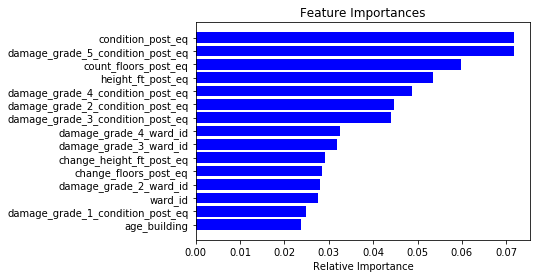

In [51]:
features = train_X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
indices = indices[-15:]

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## XGBoost

### Initial Model Setup and Grid Search

In [30]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from datetime import datetime

In [31]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [32]:
def my_custom_loss_func(ground_truth, predictions):
    return(f1_score(y_true=ground_truth,y_pred=predictions,average='weighted'))
score = make_scorer(my_custom_loss_func, greater_is_better=True)

In [35]:
#cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}

st = timer()
print(st)
cv_params = {'max_depth': [3], 'min_child_weight': [1]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 150, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'multi:softprob'}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, scoring = score, cv = 5, n_jobs = -1)

2018-07-18 16:15:31.247582


In [ ]:
optimized_GBM.fit(train_X, train_y)
print(timer())
print(timer()-st)

---

In [ ]:
gbm = xgb.XGBClassifier(max_depth=8,
                    learning_rate = 0.01,
                    n_estimators=100,
                    subsample=0.9,
                    colsample_bytree=0.45,
                    objective="multi:softprob",
                    silent = False,
                    min_child_weight=1,                       
                    nthread=-1)

In [ ]:
gbm.fit(train_X, train_y, eval_metric="mlogloss",
        eval_set = [(train_X, train_y)], verbose=10)                        

In [ ]:
xgb_pred = gbm.predict(test_X)

In [ ]:
submission = pd.DataFrame({ 'building_id': test.building_id,
                            'damage_grade': xgb_pred })

submission['damage_grade'] = submission['damage_grade'].astype(str)
submission['damage_grade'] = "Grade " + submission.loc[:,'damage_grade']
submission.to_csv('xgboost_woe_100estimators.csv', index=False)

---

In [ ]:
gbm = xgb.XGBClassifier(max_depth=6, n_estimators=150, learning_rate=0.5, objective= "multi:softprob", silent=False)
gbm.fit(train_X, train_y, eval_metric='mlogloss')

In [ ]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

fit_params = {'eval_metric': 'mlogloss'}

In [ ]:
xgbc = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='multi:softprob', silent=True, nthread=1)

In [ ]:
folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgbc, param_distributions=params, fit_params=fit_params, n_iter=param_comb, scoring='f1_samples', n_jobs=4, cv=skf.split(train_X,train_y), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(train_X, train_y)
timer(start_time) # timing ends here for "start_time" variable

In [ ]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)

In [ ]:
pred = gbm.predict(test_data)

In [ ]:
from sklearn import svm

clf = svm.LinearSVC()
clf.fit(train_X,train_y)
pred = clf.predict(test_data)

In [ ]:
pred = pred + 1

In [ ]:
submission = pd.DataFrame({ 'building_id': test.building_id,
                            'damage_grade': pred })

submission['damage_grade'] = submission['damage_grade'].astype(str)
submission['damage_grade'] = "Grade " + submission.loc[:,'damage_grade'] 

In [ ]:
submission.to_csv('Dataset/submission_8.csv', index=False)